# Library

In [8]:
import os
import pandas as pd
import seaborn as sns
import numpy as np

In [9]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load Data

In [10]:
# columns = {'reviews', 'label'}
# train = pd.DataFrame(columns = columns)
# test = pd.DataFrame(columns = columns)

In [11]:
# base_train = 'train/pos'
# for file in os.listdir(base_train):
#     f = open(base_train + '/' + file, "r", encoding="utf8")
#     row = {'reviews' : f.read(), 'label' : 1}
#     train = train.append(row, ignore_index = True)

In [12]:
# base_train = 'train/neg'
# for file in os.listdir(base_train):
#     f = open(base_train + '/' + file, "r", encoding="utf8")
#     row = {'reviews' : f.read(), 'label' : 0}
#     train = train.append(row, ignore_index = True)

In [13]:
# train.to_csv('train/train.csv', index=False)

In [14]:
train = pd.read_csv('train/train.csv')

In [15]:
#train = train.sample(frac = 1)

In [16]:
#train = train.head(15000)

In [17]:
train = train[['reviews', 'label']]
train.head()

,reviews,label
0,"Universal's answer to ""The Exorcist"" isn't a v...",0
1,The Tooth Fairy is set in a small town somewhe...,0
2,I saw this movie with my dad. I must have been...,1
3,Bridges of madison county is a better made ver...,0
4,"That is no criticism of the film, but rather a...",1


<AxesSubplot:xlabel='label', ylabel='count'>

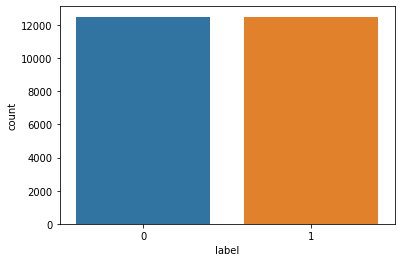

In [18]:
sns.countplot(data=train, x='label')

In [19]:
corpus = []
for i in range(0, len(train)):
  review = re.sub('[^a-zA-Z]', ' ', train['reviews'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 500)
X = cv.fit_transform(corpus).toarray()
y = train.iloc[:, -1].values

In [21]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# cv = TfidfVectorizer()
# X = cv.fit_transform(corpus).toarray()
# y = train.iloc[:, -1].values

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [23]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [24]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2077  418]
 [ 590 1915]]


0.7984

In [26]:
test = ["I don't understand why the notes are so low. It's been months since I've seen a film so powerful, so fine, so right. As much in the subject matter as in the acting. A film about life, real life. Its violence and beauty. To what extent children are the wealth of this world. An ode to life. Poignant."]
test_vec = cv.transform(test).toarray()
classifier.predict(test_vec)

array([1], dtype=int64)

# Saving Model

In [27]:
import pickle
pkl_filename = "model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump((model, cv, le), file)

NameError: name 'nb' is not defined